Importing the Libraries

In [590]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder


Data Collection and Processing

In [591]:
# loading data from csv file to pandas dataframe
car_data = pd.read_csv('/content/car_data.csv')

In [592]:
# checking the first 10 rows of dataframe
car_data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [593]:
# checking the number of rows and columns
car_data.shape


(2059, 20)

In [594]:
car_data=car_data.dropna()

In [596]:

# getting some insights from dataset
car_data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1874 entries, 0 to 2057
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width      

In [597]:
car_data=car_data.rename(columns={"Fuel Type": "fuel","Seller Type":"seller"})

In [598]:
car_data= car_data.drop(['Location','Color','Engine','Max Power','Max Torque','Drivetrain'], axis=1)

In [599]:
#checking the number of missing values
car_data.isnull().sum()


,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
fuel,0
Transmission,0
Owner,0
seller,0
Length,0


In [601]:
#checking the distribution of categorical data
print(car_data.fuel.value_counts())
print(car_data.seller.value_counts())
print(car_data.Transmission.value_counts())
print(car_data.Owner.value_counts())

fuel
Diesel          954
Petrol          866
CNG              45
LPG               4
Hybrid            3
CNG + CNG         1
Petrol + CNG      1
Name: count, dtype: int64
seller
Individual                 1816
Corporate                    53
Commercial Registration       5
Name: count, dtype: int64
Transmission
Manual       1037
Automatic     837
Name: count, dtype: int64
Owner
First               1504
Second               322
Third                 30
UnRegistered Car      18
Name: count, dtype: int64


In [603]:
# encoding "fuel" Column
car_data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Hybrid':4}},inplace=True)

# encoding "seller_type" Column
car_data.replace({'seller':{'Individual':0,'Corporate':1,'Commercial Registration':2}},inplace=True)


# encoding "transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "Owner" Column
car_data.replace({'Owner':{'First':0,'Second':1,'Third':2,'UnRegistered Car':3}},inplace=True)



In [604]:
# Label encoding the make and model for regression models
le_make = LabelEncoder()
le_model = LabelEncoder()

car_data['Make'] = le_make.fit_transform(car_data['Make'])
car_data['Model'] = le_model.fit_transform(car_data['Model'])

In [605]:
car_data = car_data[car_data['fuel'] != 'Petrol + CNG']

In [607]:
car_data = car_data[car_data['fuel'] != 'CNG + CNG']

Encoding the categorical data

In [608]:
# again checking top 10 data to verify encoding
car_data.head()

,Make,Model,Price,Year,Kilometer,fuel,Transmission,Owner,seller,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,7,92,505000,2017,87150,0,0,0,1,3990.0,1680.0,1505.0,5.0,35.0
1,18,731,450000,2014,75000,1,0,1,0,3995.0,1695.0,1555.0,5.0,42.0
2,8,940,220000,2011,67000,0,0,0,0,3585.0,1595.0,1550.0,5.0,35.0
3,29,453,799000,2019,37500,0,0,0,0,3995.0,1745.0,1510.0,5.0,37.0
4,29,503,1950000,2018,69000,1,0,0,0,4735.0,1830.0,1795.0,7.0,55.0


Splitting the data and target


In [609]:
X = car_data.drop(['Price'],axis=1)
Y = car_data['Price']


In [610]:
print(X)

      Make  Model  Year  Kilometer fuel  Transmission  Owner  seller  Length  \
0        7     92  2017      87150    0             0      0       1  3990.0   
1       18    731  2014      75000    1             0      1       0  3995.0   
2        8    940  2011      67000    0             0      0       0  3585.0   
3       29    453  2019      37500    0             0      0       0  3995.0   
4       29    503  2018      69000    1             0      0       0  4735.0   
...    ...    ...   ...        ...  ...           ...    ...     ...     ...   
2053    18    641  2014      79000    0             0      1       0  3775.0   
2054    17    914  2016      90300    1             0      0       0  4585.0   
2055     8    379  2014      83000    0             0      1       0  3495.0   
2056     6    418  2013      73000    0             0      0       0  3795.0   
2057     1      9  2018      60474    1             1      0       0  4936.0   

       Width  Height  Seating Capacity 

In [611]:
print(Y)

0        505000
1        450000
2        220000
3        799000
4       1950000
         ...   
2053     245000
2054     850000
2055     275000
2056     240000
2057    4290000
Name: Price, Length: 1872, dtype: int64


Splitting Training and Test data

In [612]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,random_state=2)

Model Training

**Linear Regression Model**


In [613]:
# loading linear regression model
lin_reg = LinearRegression()

In [614]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

Model Evaluation


In [615]:
#prediction on training data
training_data_prediction = lin_reg.predict(X_train)

In [616]:
# R Squared Error
error_square= metrics.r2_score(Y_train,training_data_prediction)
print(error_square)

0.5181775423927455


Visualise the actual price and predicted prices

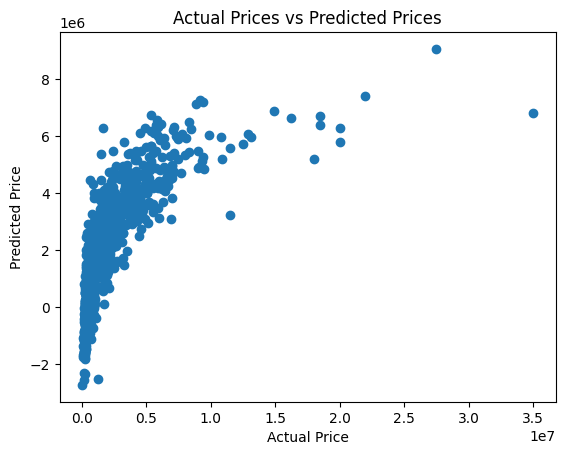

In [617]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [618]:
#prediction on training data
test_data_prediction = lin_reg.predict(X_test)

In [619]:
# R Squared Error
error_square= metrics.r2_score(test_data_prediction,Y_test)
print(error_square)

0.23976814949437408


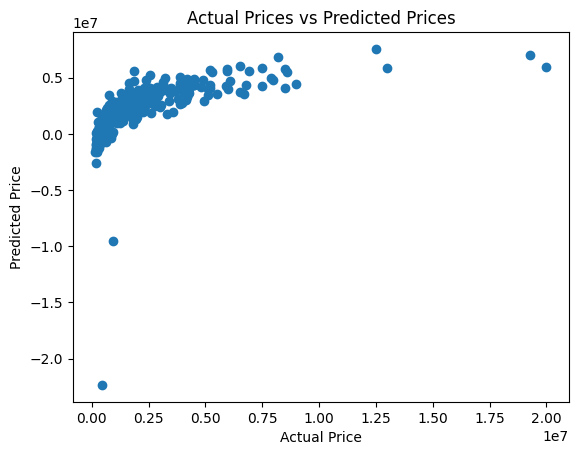

In [620]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**Lasso Regression**

In [621]:
# loading linear regression model
lass_reg = Lasso()

In [622]:
lass_reg.fit(X_train,Y_train)

Lasso()

Model Evaluation


In [623]:
#prediction on training data
training_data_prediction_lass = lass_reg.predict(X_train)

In [624]:
# R Squared Error
error_square= metrics.r2_score(Y_train,training_data_prediction_lass)
print(error_square)

0.5181775423865126


Visualise the actual price and predicted prices

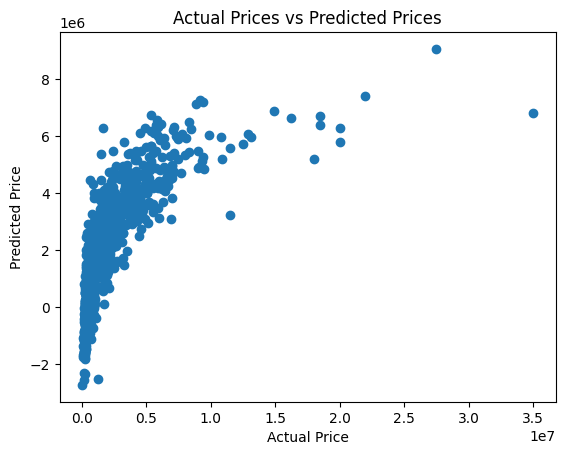

In [625]:
plt.scatter(Y_train,training_data_prediction_lass)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [626]:
#prediction on training data
test_data_prediction_lass = lass_reg.predict(X_test)

In [627]:
# R Squared Error
error_square= metrics.r2_score(Y_test,test_data_prediction_lass)
print(error_square)

0.2741945443683613


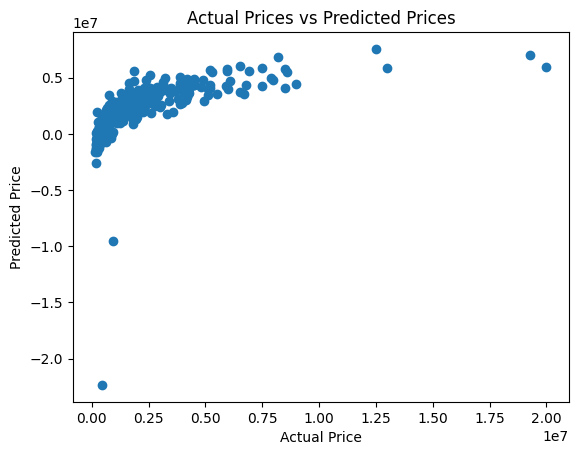

In [628]:
plt.scatter(Y_test,test_data_prediction_lass)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**Random Forest Regression**


In [629]:
# loading Random Forest Regression model
regressor = RandomForestRegressor()

In [630]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation


In [631]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [632]:
# R Squared Error
error_square= metrics.r2_score(Y_train,training_data_prediction)
print(error_square)

0.9730009129777194


Visualise the actual price and predicted prices

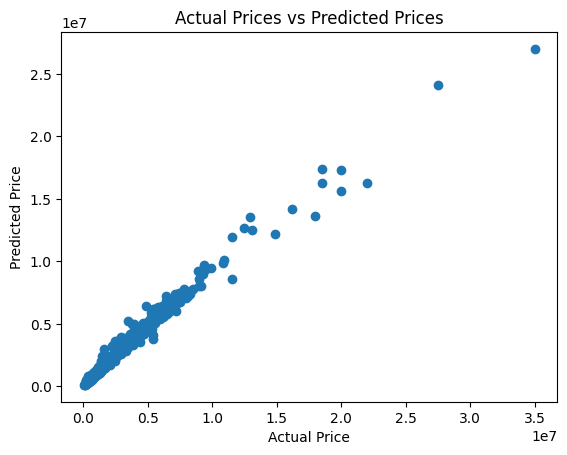

In [633]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [640]:
#prediction on training data
test_data_prediction_reg = regressor.predict(X_test)

In [641]:
# R Squared Error
error_square= metrics.r2_score(Y_test,test_data_prediction_reg)
print(error_square)

0.9141195834393088


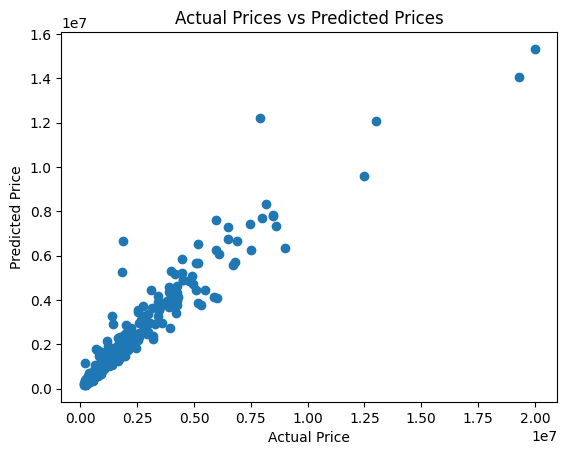

In [643]:
plt.scatter(Y_test,test_data_prediction_reg)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()